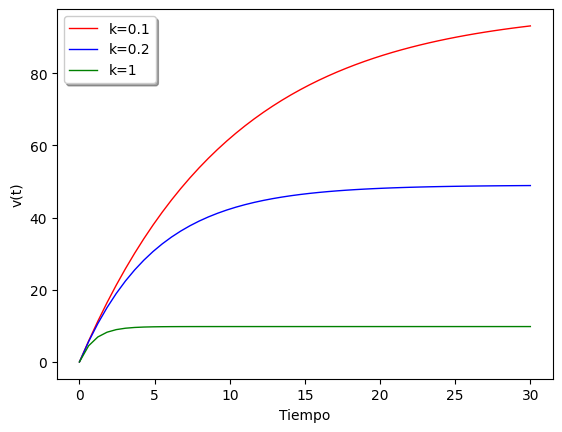

In [1]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

# función que entrega dv/dt
def modelo(v,t,k):
    dvdt = g - k * v/m
    return dvdt

# condición inicial
v0 = 0

#parámetros
g = 9.8
m = 1 

# valores de tiempo
t = np.linspace(0,30)

# soluciones EDO para distintos k
k = 0.1
v1 = odeint(modelo,v0,t,args=(k,))
k = 0.2
v2 = odeint(modelo,v0,t,args=(k,))
k = 1
v3 = odeint(modelo,v0,t,args=(k,))

# gráfico
plt.plot(t,v1,'r',linewidth=1,label='k=0.1')
plt.plot(t,v2,'b',linewidth=1,label='k=0.2')
plt.plot(t,v3,'g',linewidth=1,label='k=1')
plt.xlabel('Tiempo')
plt.ylabel('v(t)')
plt.legend(shadow=True)
plt.show()

In [2]:
from sympy import symbols, Function, dsolve

# Símbolos
t, g, k , m, v0= symbols("t, g, k, m, v0")

# v es función del tiempo
v = Function('v')(t)

# Derivada de v
dvdt = v.diff(t)

# Ecuación diferencial
eq = dvdt - g + k*v/m

# Solución de la EDO con la condición inicial v(0)=v0
dsolve(eq, v, ics={v.subs(t, 0): v0})

Eq(v(t), g*m/k + (-g*m + k*v0)*exp(-k*t/m)/k)

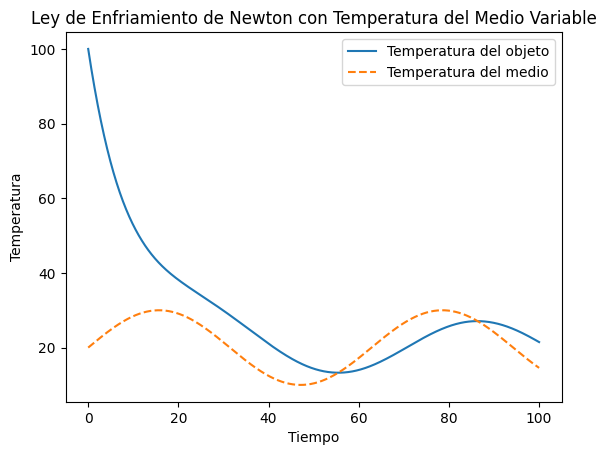

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Parámetros de la ley de enfriamiento de Newton
k = -0.1  # Constante de enfriamiento

# Función que define la temperatura del medio variable en el tiempo
def T_m(t):
    return 20 + 10 * np.sin(0.1 * t)

# Definición de la EDO para la ley de enfriamiento de Newton
def Newton(t, T):
    return k * (T - T_m(t))

# Condición inicial
T0 = 100  # Temperatura inicial del objeto

# Intervalo de tiempo para la simulación
t_span = (0, 100)
t_eval = np.linspace(t_span[0], t_span[1], 1000)

# Resolver la EDO
sol = solve_ivp(Newton, t_span, [T0], t_eval=t_eval)

# Graficar los resultados
plt.plot(sol.t, sol.y[0], label='Temperatura del objeto')
plt.plot(sol.t, T_m(sol.t), label='Temperatura del medio', linestyle='dashed')
plt.xlabel('Tiempo')
plt.ylabel('Temperatura')
plt.legend()
plt.title('Ley de Enfriamiento de Newton con Temperatura del Medio Variable')
plt.show()

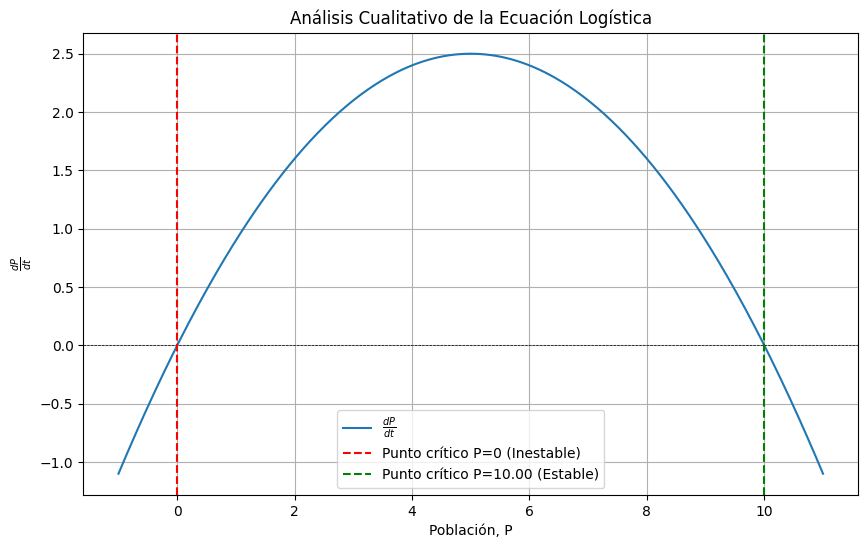

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de la ecuación
a = 1.0  # Tasa de crecimiento
b = 0.1  # Tasa de competencia

# Función para la derivada dP/dt
def dP_dt(P):
    return a * P - b * P**2

# Encontrar puntos críticos
P_critical = [0, a / b]

# Analizar la estabilidad de los puntos críticos
stability = []
for P in P_critical:
    derivative_at_P = a - 2 * b * P
    if derivative_at_P < 0:
        stability.append("Estable")
    elif derivative_at_P > 0:
        stability.append("Inestable")
    else:
        stability.append("Indeterminado")

# Graficar el campo de pendientes
P_vals = np.linspace(-1, a / b + 1, 400)
dP_vals = dP_dt(P_vals)

plt.figure(figsize=(10, 6))
plt.plot(P_vals, dP_vals, label=r'$\frac{dP}{dt}$')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(P_critical[0], color='red', linestyle='--', label=f'Punto crítico P={P_critical[0]} ({stability[0]})')
plt.axvline(P_critical[1], color='green', linestyle='--', label=f'Punto crítico P={P_critical[1]:.2f} ({stability[1]})')
plt.xlabel('Población, P')
plt.ylabel(r'$\frac{dP}{dt}$')
plt.title('Análisis Cualitativo de la Ecuación Logística')
plt.legend()
plt.grid(True)
plt.show()
